<a href="https://colab.research.google.com/github/josemacoel/Evaluacion-5/blob/main/Actividad_5_P3_A01734153.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 5 | Parte 2**

### **José María Colombres Elguea**

### **Matrícula: A01734153**

In [37]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

# **Etapa 3 | Extracción de Características y Visualización de DATOS**

# **Preparación**

In [39]:
california= pd.read_csv("California_EUA_LIMPIO.csv",encoding = "unicode_escape")
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Ã¯Â»Â¿id                                      6936 non-null   float64
 1   host_id                                       6936 non-null   int64  
 2   latitude                                      6936 non-null   float64
 3   longitude                                     6936 non-null   float64
 4   scrape_id                                     6936 non-null   float64
 5   host_listings_count                           6936 non-null   float64
 6   host_total_listings_count                     6936 non-null   float64
 7   accommodates                                  6936 non-null   float64
 8   bedrooms                                      6936 non-null   float64
 9   beds                                          6936 non-null   f

In [40]:
girona= pd.read_csv("Girona_España_LIMPIO.csv",encoding = "unicode_escape")

<ipython-input-40-5c18e1cd184f>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  girona= pd.read_csv("Girona_España_LIMPIO.csv",encoding = "unicode_escape")


In [41]:
mexico= pd.read_csv("DF_Mexico_LIMPIO.csv")

<ipython-input-41-1ab05d9d5587>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  mexico= pd.read_csv("DF_Mexico_LIMPIO.csv")


# **Análisis por columna**

## **Columna host_response_time**

In [42]:
california1= freq_tbl(california['host_response_time'])
california1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,4221,0.608564,0.608564
1,within a few hours,1111,0.160179,0.768743
2,No Data Available,1019,0.146915,0.915657
3,within a day,452,0.065167,0.980825
4,a few days or more,133,0.019175,1.000000


In [43]:
girona1= freq_tbl(girona['host_response_time'])
girona1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,12261,0.623779,0.623842
1,within a few hours,2699,0.137312,0.761168
2,within a day,2188,0.111315,0.872494
3,No Data Available,2088,0.106227,0.978732
4,a few days or more,418,0.021266,1.000000


In [44]:
mexico1= freq_tbl(mexico['host_response_time'])
mexico1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,16996,0.701589,0.701647
1,No Data Available,3091,0.127595,0.829253
2,within a few hours,1966,0.081156,0.910416
3,within a day,1450,0.059856,0.970276
4,a few days or more,720,0.029721,1.000000


In [45]:
#Filtro de valores mayores al número seleccionado (en caso de ser necesario)
Filtro1= california1[california1['frequency']>1]
Filtro2= girona1[girona1['frequency']>1]
Filtro3= mexico1[mexico1['frequency']>1]

In [46]:
#Ajustar índice para las 3 tablas
Filtro1_index= Filtro1.set_index('host_response_time')
Filtro2_index= Filtro2.set_index('host_response_time')
Filtro3_index= Filtro3.set_index('host_response_time')

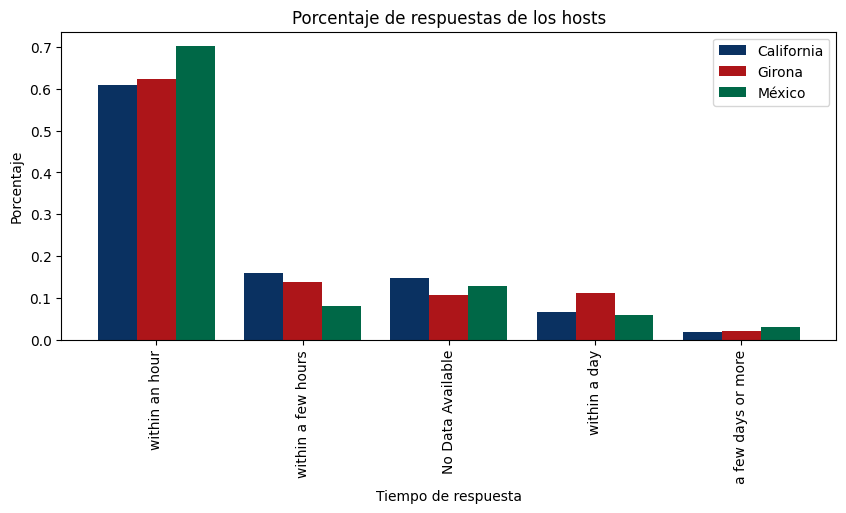

In [47]:
# Gráfica de barras

# Unir los tres dataframes en uno con la columna de percentage
filtro = pd.concat([Filtro1_index["percentage"], Filtro2_index["percentage"], Filtro3_index["percentage"]], axis=1, join='outer')

# Crear la gráfica de barras con colores
filtro.plot(kind='bar', width=0.8, figsize=(10,4), color=['#0A3161','#AD1519','#006847'])

# Se agregan títulos y etiquetas
plt.legend(['California','Girona','México'])
plt.title('Porcentaje de respuestas de los hosts')
plt.xlabel('Tiempo de respuesta')
plt.ylabel('Porcentaje')

plt.show()

### **Interpretación**

La gráfica presentada muestra el porcentaje de respuestas acorde al total de cada categoría. Se eligió realizar la comparativa a través del porcentaje debido a que en el total hay una gran diferencia entre el número de datos que tiene cada ciudad, por lo que el porcentaje muestra un estudio más sigificativo.

Se puede observar que en México el porcentaje de respuesta dentro del marco de una hora para el host es mayor, con un 70%. Esto es un buen índice ya que casi 3/4 de los host responden en menos de una hora. Por otro lado, California tiene el porcentaje más alto de host que responden dentro de unas horas, pero al mismo tiempo es el que más registros con "No Data Available" tiene, a pesar de ser un df con menos registros. Girona es la ciudad que que tiene mayor porcentaje de host que responden en el marco de un día, pero, esto puede deberse a un tema cultural. 

**Nota adicional:** Se eligieron los colores más representativos de cada país acorde a su bandera, que se usarán para representar en todo el documento

Se muestra una gráfica extra que muestra los mismos datos pero separados en 3 ejes

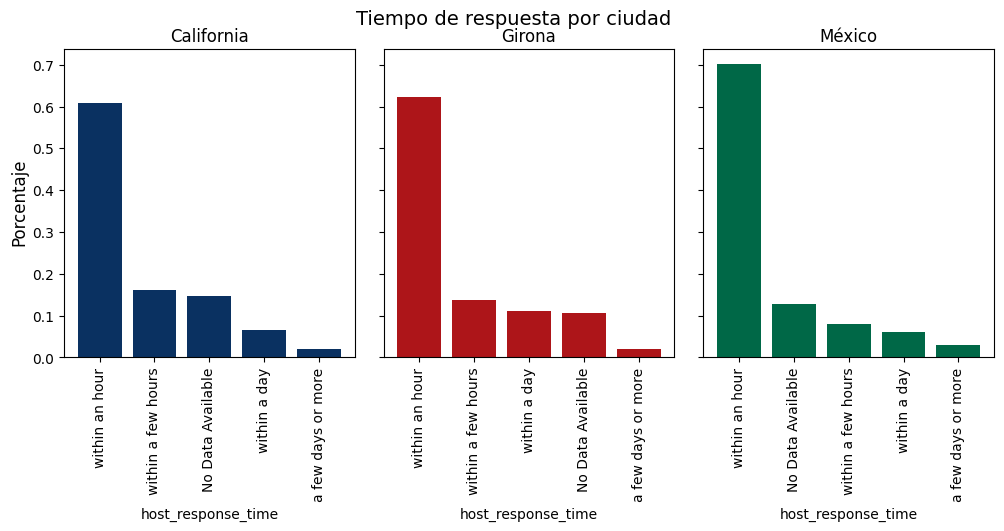

In [48]:
#Gráfico de barras
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

Filtro1_index["percentage"].plot(kind='bar', ax=axs[0], color='#0A3161', width=0.8)
Filtro2_index["percentage"].plot(kind='bar', ax=axs[1], color='#AD1519', width=0.8)
Filtro3_index["percentage"].plot(kind='bar', ax=axs[2], color='#006847', width=0.8)

axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('México')

# Agregamos títulos de los ejes
fig.text(0.08, 0.5, 'Porcentaje', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Tiempo de respuesta por ciudad', fontsize=14)
plt.show()


## **Columna host_identity_verified**

In [49]:
california2= freq_tbl(california['host_identity_verified'])
california2

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,6106,0.880334,0.880334
1,f,830,0.119666,1.000000


In [50]:
girona2= freq_tbl(girona['host_identity_verified'])
girona2

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,17276,0.878917,0.879007
1,f,2261,0.115028,0.994047
2,No Data Available,117,0.005952,1.000000


In [51]:
mexico2= freq_tbl(mexico['host_identity_verified'])
mexico2

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,22300,0.920537,0.920613
1,f,1923,0.079381,1.000000


In [52]:
#Filtro de valores mayores al número seleccionado (en caso de ser necesario)
Filtro1= california2[california2['frequency']>1]
Filtro2= girona2[girona2['frequency']>1]
Filtro3= mexico2[mexico2['frequency']>1]

In [53]:
#Ajustar índice para las 3 tablas
Filtro1_index= Filtro1.set_index('host_identity_verified')
Filtro2_index= Filtro2.set_index('host_identity_verified')
Filtro3_index= Filtro3.set_index('host_identity_verified')

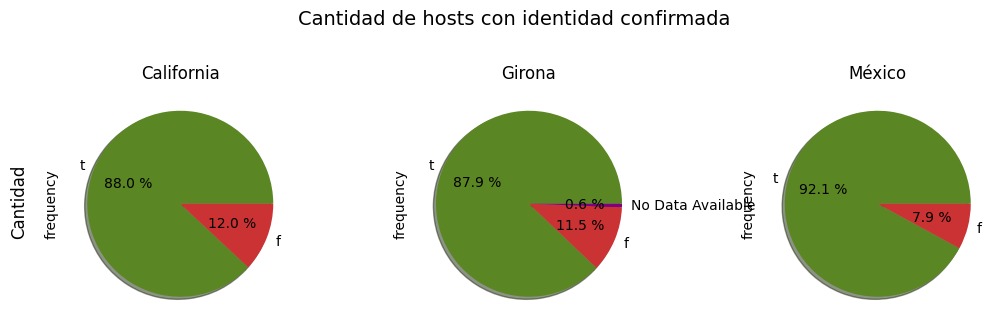

In [54]:
#Gráfica de pastel
fig, axs = plt.subplots(1, 3)

Filtro1_index["frequency"].plot(kind='pie', colors=['#5b8624', '#cb3234', '#800080'], shadow=True, autopct="%0.1f %%", ax=axs[0])
Filtro2_index["frequency"].plot(kind='pie', colors=['#5b8624', '#cb3234', '#800080'], shadow=True, autopct="%0.1f %%", ax=axs[1])
Filtro3_index["frequency"].plot(kind='pie', colors=['#5b8624', '#cb3234', '#800080'], shadow=True, autopct="%0.1f %%", ax=axs[2])

# Establecer los títulos de los subgráficos
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('México')

# Ajustar los tamaños de los subgráficos y los espacios entre ellos
fig.set_size_inches(12, 4)
plt.subplots_adjust(wspace=0.5)

# Agregar títulos de los ejes y el título de la figura
fig.text(0.08, 0.5, 'Cantidad', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Cantidad de hosts con identidad confirmada', fontsize=14)

plt.show()


### **Interpretación**

Ciudad de México es el lugar con mayor cantidad de hosts con identidad confirmada, con un 92%. Esto es notable debido a que también es la ciudad con mayor registro de propiedades de AirBnB. Por otro lado, Girona es la ciudad con menor porcentaje, sin embargo esto puede deberse a que hay un porcentaje mínimo de los datos que no tienen registro, específicamente 117. En cantidad, México tiene el mayor número de host verificados, seguido por Girona y finalmente California. 

## **Columna number_of_reviews**

In [55]:
california3= california["number_of_reviews"].mean()
california3

18.501658016147637

In [56]:
girona.loc[girona["number_of_reviews"] == "HUTG000237", "number_of_reviews"] = 0
girona["number_of_reviews"] = girona["number_of_reviews"].astype(float)
girona3= girona["number_of_reviews"].mean()
girona3

5.959859584859585

In [57]:
mexico.loc[mexico["number_of_reviews"] == "f", "number_of_reviews"] = 0
mexico["number_of_reviews"] = mexico["number_of_reviews"].astype(float)
mexico3= mexico["number_of_reviews"].mean()
mexico3

20.164028895768833

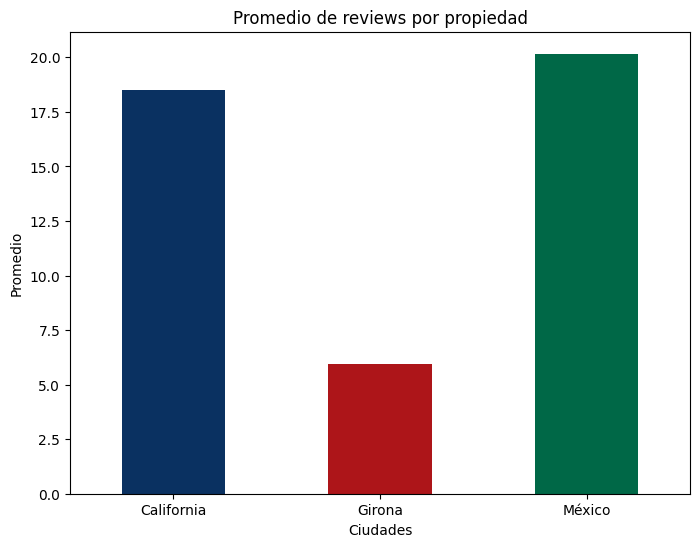

In [58]:
#Gráfica de barras

etiquetas = ["California","Girona","México"]
df = pd.DataFrame({'California': california3, 'Girona': girona3, 'México': mexico3},index=etiquetas)

df.mean().plot(kind='bar', figsize=(8, 6), color=['#0A3161', '#AD1519', '#006847'])

# Configurar títulos de la gráfica
plt.title('Promedio de reviews por propiedad')
plt.xlabel('Ciudades')
plt.ylabel('Promedio')
plt.xticks(rotation=0)

plt.show()


### **Interpretación**

Se puede observar que la ciudad con mayor promedio de reviews es Ciudad de México. Esto puede deberse a que tiene un mucho mayor mercado que los otros dos lugares, superandolos en un gran porcentaje de población. La diferencia de población es abismal, pues CDMX tiene 8.8 millones de habitantes aproximadamente, mientras que Girona tiene 100,266. Quizá tenga que ver con algo cultural, pues en México es posible que se hagan reviews sin haber estado físicamente en la propiedad, o quizá se hagan quejas múltiples. Girona es una ciudad mucho más pequeña y quizá, al ser un destino de un turismo más tranquilo (cultiral o desconexión) haya mucho menos reviews por propiedad. 

## **Columna property_type**




In [59]:
california4= freq_tbl(california['property_type'])
california4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,1848,0.266436,0.266436
1,Entire condo,879,0.126730,0.393166
2,Private room in home,853,0.122982,0.516148
3,Entire home,839,0.120963,0.637111
4,Entire guest suite,495,0.071367,0.708478
5,Private room in rental unit,471,0.067907,0.776384
6,Room in boutique hotel,352,0.050750,0.827134
7,Room in hotel,265,0.038206,0.865340
8,Private room in condo,192,0.027682,0.893022
9,Entire serviced apartment,145,0.020905,0.913927


In [60]:
girona4= freq_tbl(girona['property_type'])
girona4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,9339,0.475122,0.475170
1,Entire home,3703,0.188390,0.663580
2,Entire villa,1714,0.087200,0.750789
3,Entire condo,1400,0.071225,0.822021
4,Entire cottage,549,0.027930,0.849954
...,...,...,...,...
72,Floor,1,0.000051,0.999796
73,Shared room in cottage,1,0.000051,0.999847
74,Shared room in nature lodge,1,0.000051,0.999898
75,Private room in pension,1,0.000051,0.999949


In [61]:
mexico4= freq_tbl(mexico['property_type'])
mexico4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,8144,0.336182,0.336209
1,Entire condo,3363,0.138824,0.475044
2,Private room in rental unit,2860,0.118060,0.593114
3,Private room in home,2009,0.082931,0.676052
4,Entire loft,1584,0.065387,0.741444
...,...,...,...,...
87,Entire in-law,1,0.000041,0.999835
88,Private room in barn,1,0.000041,0.999876
89,Shared room in tiny home,1,0.000041,0.999917
90,Private room in earthen home,1,0.000041,0.999959


In [62]:
#Filtro de valores mayores al número seleccionado (en caso de ser necesario)
Filtro1= california4[california4['frequency']>100]
Filtro2= girona4[girona4['frequency']>100]
Filtro3= mexico4[mexico4['frequency']>100]

In [63]:
#Ajustar índice para las 3 tablas
Filtro1_index= Filtro1.set_index('property_type')
Filtro2_index= Filtro2.set_index('property_type')
Filtro3_index= Filtro3.set_index('property_type')

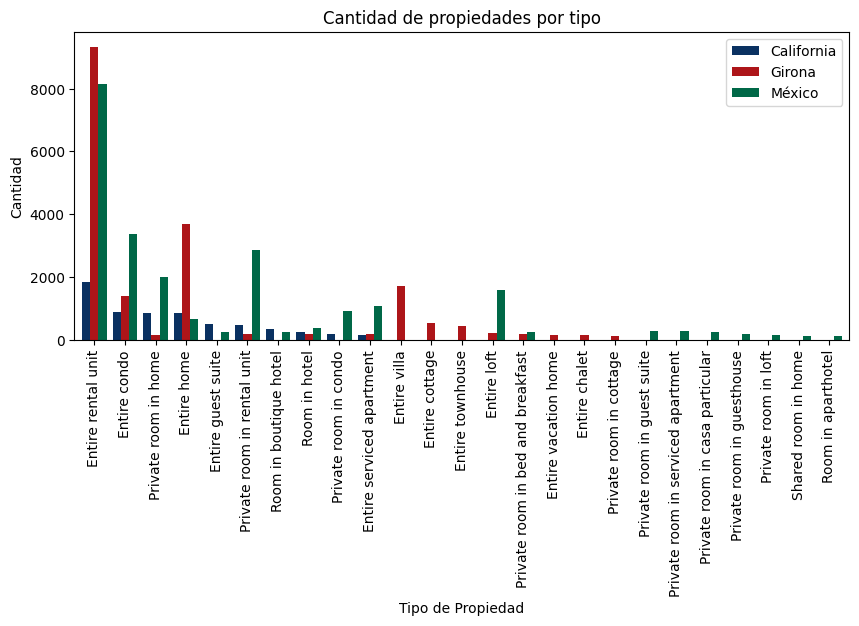

In [64]:
# Gráfica de barras

# Unir los tres dataframes en uno con la columna de percentage
filtro = pd.concat([Filtro1_index["frequency"], Filtro2_index["frequency"], Filtro3_index["frequency"]], axis=1, join='outer')

# Crear la gráfica de barras con colores
filtro.plot(kind='bar', width=0.8, figsize=(10,4), color=['#0A3161','#AD1519','#006847'])

# Se agregan títulos y etiquetas
plt.legend(['California','Girona','México'])
plt.title('Cantidad de propiedades por tipo')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')

plt.show()

### **Interpretación**

La gráfica presentada muestra la cantidad de propiedades por tipo, con un filtro previo que dejó a los tipos de propiedad que tienen más de 100 en presencia. Esto tiene el objetivo de identificar las principales propiedades de cada mercado. A partir de esto surgen estos insights principales:

* Girona tiene más de 9000 propiedades de tipo Entire Rental Unit (casas o departamentos que se rentan por completo, siendo su principal tipo
* México tiene más de 8000 propiedades de tipo Entire Rental Unit (casas o departamentos que se rentan por completo, siendo su principal tipo
* California tiene casi 2000 propiedades de tipo Entire Rental Unit (casas o departamentos que se rentan por completo, siendo su principal tipo
* En México son comunes la renta de cuartos en propiedad privada
* En Girona son más comunes las rentas de propiedades o casas enteras, debido al mercado europeo, donde es menos probable que se realicen rentas de cuartos. Un ejemplo de ello es que es el único lugar donde se rentan villas o cottages completos. 
* En California destaca también la renta de cuartos en condominios. 
* México destaca por tener más de 100 propiedades que rentan cuartos privados en diferentes tipos de construcción (casa,apartamento,loft,etc). 


**Nota adicional:** Se eligieron los colores más representativos de cada país acorde a su bandera, que se usarán para representar en todo el documento

Se muestra una gráfica extra que muestra los mismos datos pero separados en 3 ejes

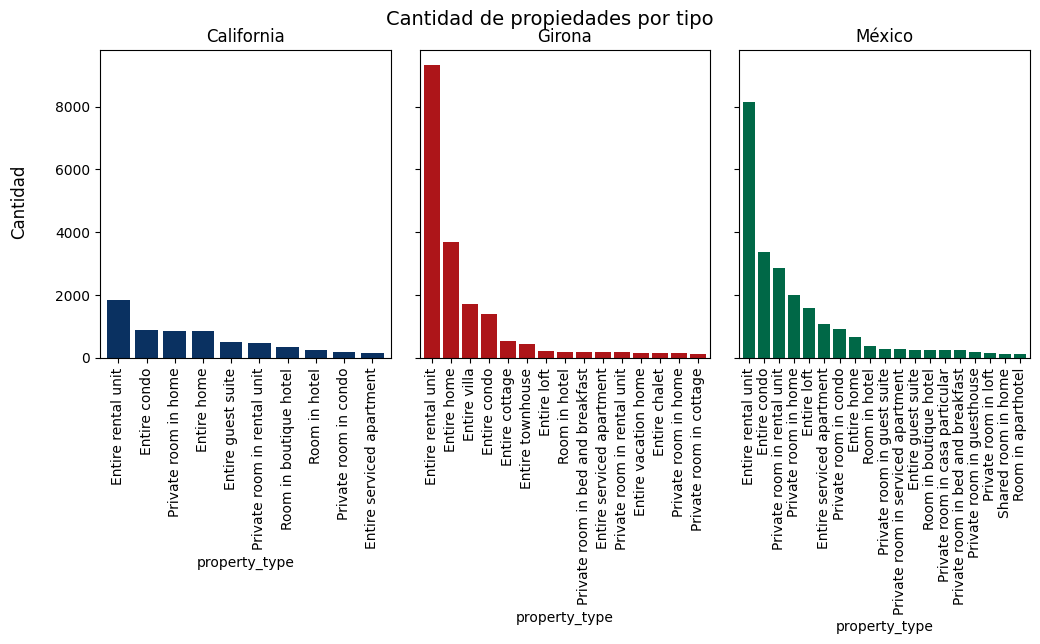

In [65]:
#Gráfico de barras
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

Filtro1_index["frequency"].plot(kind='bar', ax=axs[0], color='#0A3161', width=0.8)
Filtro2_index["frequency"].plot(kind='bar', ax=axs[1], color='#AD1519', width=0.8)
Filtro3_index["frequency"].plot(kind='bar', ax=axs[2], color='#006847', width=0.8)

axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('México')

# Agregamos títulos de los ejes
fig.text(0.05, 0.5, 'Cantidad', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Cantidad de propiedades por tipo', fontsize=14)
plt.show()


## **Columna host_acceptance_rate**




In [91]:
california5= freq_tbl(california['host_acceptance_rate'])
california5

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,2252,0.324683,0.324683
1,No Data Available,801,0.115484,0.440167
2,99%,540,0.077855,0.518022
3,97%,451,0.065023,0.583045
4,98%,258,0.037197,0.620242
...,...,...,...,...
82,27%,2,0.000288,0.999279
83,38%,2,0.000288,0.999567
84,48%,1,0.000144,0.999712
85,21%,1,0.000144,0.999856


In [92]:
girona5= freq_tbl(girona['host_acceptance_rate'])
girona5

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,7477,0.380393,0.380431
1,99%,2221,0.112993,0.493436
2,No Data Available,1153,0.058659,0.552101
3,98%,1049,0.053368,0.605475
4,96%,753,0.038309,0.643788
...,...,...,...,...
87,18%,1,0.000051,0.999796
88,23%,1,0.000051,0.999847
89,7%,1,0.000051,0.999898
90,21%,1,0.000051,0.999949


In [93]:
mexico5= freq_tbl(mexico['host_acceptance_rate'])
mexico5

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,11616,0.479505,0.479544
1,99%,2704,0.111620,0.591174
2,No Data Available,2043,0.084334,0.675515
3,98%,1031,0.042559,0.718078
4,97%,711,0.029350,0.747430
...,...,...,...,...
86,34%,2,0.000083,0.999835
87,13%,1,0.000041,0.999876
88,9%,1,0.000041,0.999917
89,18%,1,0.000041,0.999959


In [97]:
#Filtro de valores mayores al número seleccionado (en caso de ser necesario)
Filtro1= california5[california5['percentage']>0.05]
Filtro2= girona5[girona5['percentage']>0.05]
Filtro3= mexico5[mexico5['percentage']>0.05]

In [98]:
#Ajustar índice para las 3 tablas
Filtro1_index= Filtro1.set_index('host_acceptance_rate')
Filtro2_index= Filtro2.set_index('host_acceptance_rate')
Filtro3_index= Filtro3.set_index('host_acceptance_rate')

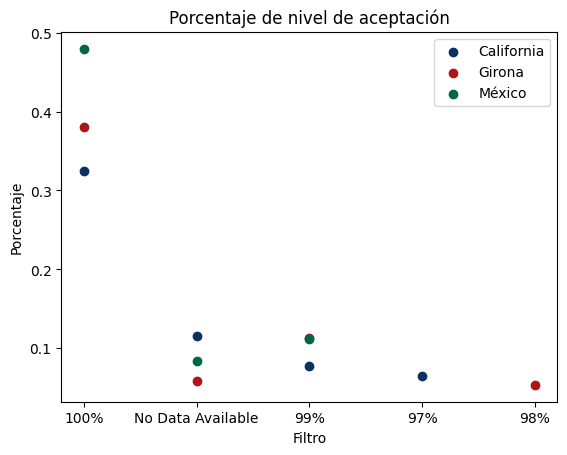

In [100]:
# Gráfica de dispersión

# Crear la gráfica de dispersión para cada dataframe
plt.scatter(Filtro1_index.index, Filtro1_index["percentage"], color='#0A3161')
plt.scatter(Filtro2_index.index, Filtro2_index["percentage"], color='#AD1519')
plt.scatter(Filtro3_index.index, Filtro3_index["percentage"], color='#006847')

# Agregar títulos y etiquetas
plt.legend(['California','Girona','México'])
plt.title('Porcentaje de nivel de aceptación')
plt.xlabel('Filtro')
plt.ylabel('Porcentaje')

plt.show()


### **Interpretación**

La gráfica de dispersión presentada muestra aquellos porcentajes cuyo valor porcentual equivale a más de 5%, es decir el top de los valores de aceptación. Se puede observar que México los host que tienen un radio de aceptación de 100%, representan el 47% del total de porcentajes. Esto queire decir que los host en México aceptan a mucho más personas y porcentaje que los host en California y Girona. Se puede observar que en Girona el 98% destaca, lo que significa que al menos 2% de las reservas para estos host son rechazadas. Esto puede indicar elementos positivos y negativos. Por una parte, entre mejor índice de aceptación mayor es la reputación del host, pero también es posible que se rente a personas que no respeten reglas de alquiler o dañen la propiedad. 
